In [1]:
from nltk.corpus import treebank
import nltk
from nltk import pos_tag, word_tokenize
from nltk.tag import CRFTagger, DefaultTagger
from nltk.tag.brill import BrillTagger
import re
import unicodedata
from nltk.tbl.template import Template
from nltk.tag.brill import Pos, Word
from nltk.tag import untag, RegexpTagger, BrillTaggerTrainer

from matplotlib import pyplot as plt
from nltk.tag import TaggerI
import spacy.tokens


### Data

In [5]:
train_sentences = treebank.tagged_sents()[:3000]
test_sentences = treebank.tagged_sents()[3000:]

### Spacy

In [2]:
class SpacyTagger(TaggerI):

    def __init__(self):
        super(SpacyTagger, self).__init__()

        self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    def tag(self, tokens):
        doc = spacy.tokens.doc.Doc(self.nlp.vocab, words=tokens)

        for _, proc in self.nlp.pipeline:
            doc = proc(doc)

        return [(t.text, t.tag_) for t in doc]

In [3]:
spacy_tagger = SpacyTagger()

In [8]:
spacy_tagger.evaluate(test_sentences)

0.8884955752212389

### Transformational model

In [10]:
Template._cleartemplates() #clear any templates created in earlier tests
templates = [Template(Pos([-1])), Template(Pos([-1]), Word([0]))]

In [ ]:


eval_scores = []
tagger1 = spacy_tagger

In [24]:
for i in range(20):
    tt = BrillTaggerTrainer(tagger1, templates, trace=3)
    tagger1 = tt.train(train_sentences, max_rules=10)
    score = tagger1.evaluate(test_sentences)
    eval_scores.append(score)

TBL train (fast) (seqs: 3000; tokens: 77511; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 3574 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
   4   4   0   0  | CD->-NONE- if Pos:DT@[-1] & Word:0@[0]
   4   4   0   0  | CD->JJ if Pos:CC@[-1] & Word:30-day@[0]
   4   4   0   0  | JJ->-NONE- if Pos:JJ@[-1] & Word:*-3@[0]
   4   4   0   0  | JJ->-NONE- if Pos:RB@[-1] & Word:*T*-1@[0]
   4   4   0   0  | JJ->-NONE- if Pos:VBG@[-1] & Word:*T*-1@[0]
   4   4   0   0  | JJ->NNP if Pos:NNP@[-1] & Word:High@[0]
   4   4   0   0  | NN->-NONE- if Pos:-NONE-@[-1] & Word:*ICH*-1@[0]
   4   4   0   0  | NN->-NONE

   3   3   0   0  | NN->JJ if Pos:CC@[-1] & Word:stock-index@[0]
   3   3   0   0  | NN->JJ if Pos:DT@[-1] & Word:closing@[0]
   3   3   0   0  | NN->JJ if Pos:DT@[-1] & Word:index-arbitrage@[0]
   3   3   0   0  | NN->JJ if Pos:IN@[-1] & Word:fetal-tissue@[0]
   3   3   0   0  | NN->JJ if Pos:JJ@[-1] & Word:relative@[0]
   3   3   0   0  | NN->NNP if Pos:IN@[-1] & Word:OSHA@[0]
   3   3   0   0  | NN->NNP if Pos:NNP@[-1] & Word:A.@[0]
   3   3   0   0  | NNP->-LRB- if Pos:NNS@[-1] & Word:-LRB-@[0]
   3   3   0   0  | NNP->-NONE- if Pos:-NONE-@[-1] & Word:*-1@[0]
   3   3   0   0  | NNP->-NONE- if Pos:VB@[-1] & Word:*T*-1@[0]
TBL train (fast) (seqs: 3000; tokens: 77511; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 3463 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r

TBL train (fast) (seqs: 3000; tokens: 77511; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 3350 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
   2   2   0   0  | CD->JJ if Pos:VBZ@[-1] & Word:62%-owned@[0]
   2   2   0   0  | CD->NNP if Pos:NN@[-1] & Word:II@[0]
   2   2   0   0  | DT->-NONE- if Pos:WDT@[-1] & Word:*T*-1@[0]
   2   2   0   0  | IN->CC if Pos:NNP@[-1] & Word:v.@[0]
   2   2   0   0  | IN->TO if Pos:''@[-1] & Word:to@[0]
   2   2   0   0  | IN->TO if Pos:DT@[-1] & Word:to@[0]
   2   2   0   0  | JJ->-NONE- if Pos:,@[-1] & Word:*-2@[0]
   2   2   0   0  | JJ->-NONE- if Pos:-NONE-@[-1] &

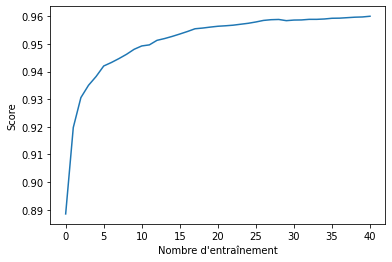

In [25]:
plt.plot(list(range(len(eval_scores))), eval_scores)
plt.xlabel("Nombre d'entraînement")
plt.ylabel('Score')
plt.show()

In [26]:
eval_scores[-1]

0.9600259011439672

In [23]:
eval_scores = eval_scores[:21]